In [1]:
#importing required modules 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#creating column names
#loading csv file into a dataframe and assigning columns names as well
tbl_cols = ['draw_dt', 'first_num', 'second_num', 'third_num', 'fourth_num', 'fifth_num', 'mega_ball']
mm_tbl = pd.read_csv('winning_numbers_by_date_pd.txt',  header=None, names=tbl_cols, parse_dates=['draw_dt'])

In [3]:
#build next draw date 
mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 1.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(3)
mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 4.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(4)

In [4]:
#latest winning megaball
last_winning_megaball = mm_tbl.loc[mm_tbl['draw_dt'].idxmax()]['mega_ball']

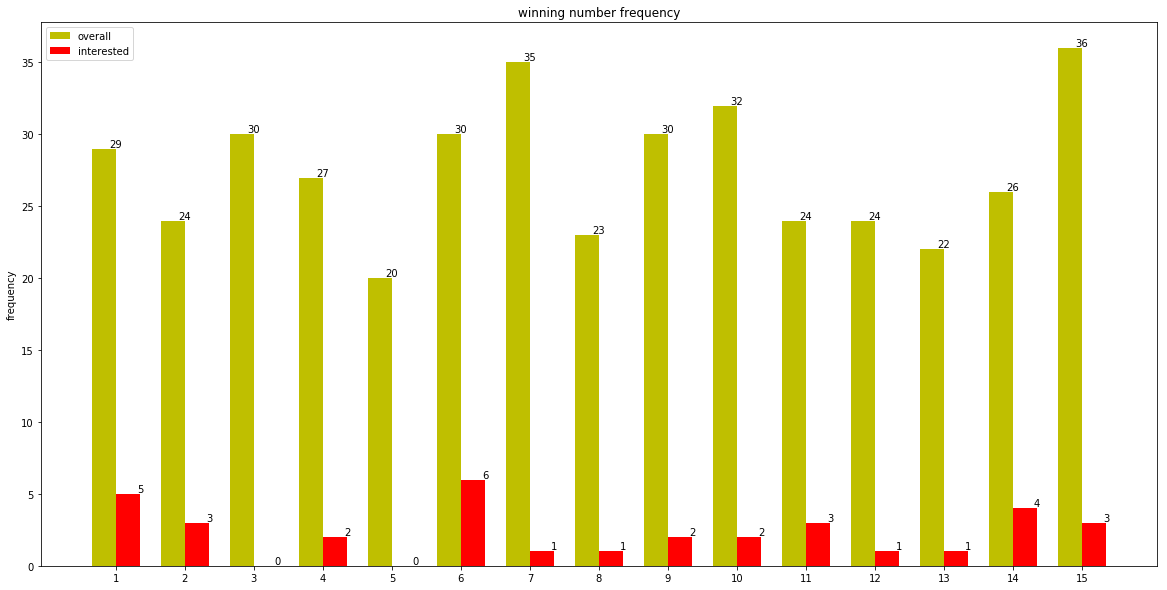

In [5]:
#winning frequency series of megaball
freq_tble = mm_tbl['mega_ball'].value_counts()

#if no occurance of any megaball, assign zero value 
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0

#store megaball numbers in x-axis and corrresponding values in y-axis        
x = freq_tble.sort_index().index
y1 = freq_tble.sort_index().values

#build a series of next dates of latest winning megaball
next_win_dt = mm_tbl.loc[mm_tbl['mega_ball'] == last_winning_megaball]['next_draw_dt']

#winning frequency series of megaball after latest winning ball
freq_tble = pd.merge(mm_tbl,
                     pd.DataFrame(next_win_dt),
                     left_on='draw_dt',
                     right_on='next_draw_dt'
                    )['mega_ball'].value_counts() 

#if no occurance of any megaball, assign zero value 
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0

#store megaball winning frequency values in y-axis 
y2 = freq_tble.sort_index().values

N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind, y1, width, color='y')
rects2 = ax.bar(ind + width, y2, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('frequency')
ax.set_title('winning number frequency')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((ind + 1))

ax.legend((rects1[0], rects2[0]), ('overall', 'interested'))

def autolabel(rects):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width(), 
                rect.get_height(), 
                int(rect.get_height()), 
                ha='center', 
                va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()